# Load in the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
data = pd.read_csv('/Users/william/Downloads/cleaned_data.csv')

In [ ]:
data.head()

,ID,P01KPNREV,P01KPNLEV,P01KPACT30,P01HPNR12,P01HPNL12,V00SF2,V00SF3,V00SF8,V00WPRKN1,...,P02WTGA,V00RKEFFB,V00RKEFFPT,V00LKEFFB,V00LKEFFPT,V00RKRFXPN,V00LKRFXPN,V00LLWGT,V00RLWGT,cumulative_outcome
0,9000296,Yes,No,No,Yes,No,Not limited at all,Not limited at all,Not at all,None,...,No,No,No,No,No,No,No,12.0,18.0,No
1,9000622,Yes,No,Yes,Yes,No,"Yes, limited a little","Yes, limited a little",Moderately,Mild,...,No,No,No,No,No,Yes,No,14.0,14.0,Yes
2,9001695,Yes,No,No,No,No,Not limited at all,Not limited at all,Not at all,None,...,No,Yes,Yes,No,No,No,No,13.0,13.0,Yes
3,9001897,No,No,No,No,No,Not limited at all,Not limited at all,Not at all,None,...,No,Yes,No,No,No,No,No,16.0,17.0,Yes
4,9002411,Yes,No,No,No,No,"Yes, limited a little","Yes, limited a little",A little bit,None,...,Yes,No,No,No,No,No,No,18.0,22.0,No


# Split the data set into a testing and a training set

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.3, random_state=95)


In [ ]:
data_train

,ID,P01KPNREV,P01KPNLEV,P01KPACT30,P01HPNR12,P01HPNL12,V00SF2,V00SF3,V00SF8,V00WPRKN1,...,P02WTGA,V00RKEFFB,V00RKEFFPT,V00LKEFFB,V00LKEFFPT,V00RKRFXPN,V00LKRFXPN,V00LLWGT,V00RLWGT,cumulative_outcome
1489,9428490,Yes,Yes,Yes,No,No,"Yes, limited a little","Yes, limited a little",Moderately,Mild,...,Yes,No,No,No,No,No,No,17.0,12.0,Yes
364,9113414,No,No,No,No,Yes,Not limited at all,Not limited at all,Not at all,None,...,No,No,No,No,No,No,No,20.0,20.0,Yes
2939,9794849,No,Yes,No,No,No,Not limited at all,Not limited at all,Not at all,None,...,No,No,No,Yes,No,No,No,12.0,15.0,No
1342,9391984,Yes,No,Yes,No,No,Not limited at all,"Yes, limited a little",A little bit,Mild,...,No,No,No,Yes,No,Yes,No,17.0,15.0,Yes
1425,9413319,Yes,No,No,Yes,Yes,Not limited at all,Not limited at all,A little bit,None,...,No,No,No,No,No,No,No,16.0,15.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,9547677,Yes,No,No,No,No,Not limited at all,Not limited at all,Not at all,None,...,Yes,No,Yes,No,No,No,No,23.0,23.0,No
2166,9594608,No,Yes,No,Yes,Yes,Not limited at all,Not limited at all,A little bit,None,...,Yes,No,No,No,No,No,No,23.0,21.0,Yes
3603,9962232,Yes,Yes,No,No,No,Not limited at all,"Yes, limited a little",A little bit,None,...,Yes,No,No,No,No,No,No,24.0,26.0,Yes
3369,9904241,Yes,Yes,No,Yes,Yes,Not limited at all,Not limited at all,Not at all,None,...,No,No,No,Yes,No,No,Yes,13.0,14.0,No


# Encoding of variables

In [ ]:
# We need only numerical variables for this model
# Then, we replace the value 'Yes' of the outcome by 1, and 'No' by 0

y_train = data_train['cumulative_outcome']
y_train = [1 if x=='Yes' else 0 for x in y_train]
x_train = data_train[data_train.columns[1:]]
x_train = x_train.drop(columns = ['cumulative_outcome'],axis=1)

In [ ]:
x_train

,P01KPNREV,P01KPNLEV,P01KPACT30,P01HPNR12,P01HPNL12,V00SF2,V00SF3,V00SF8,V00WPRKN1,V00WPRKN2,...,P01FAMKR,P02WTGA,V00RKEFFB,V00RKEFFPT,V00LKEFFB,V00LKEFFPT,V00RKRFXPN,V00LKRFXPN,V00LLWGT,V00RLWGT
1489,Yes,Yes,Yes,No,No,"Yes, limited a little","Yes, limited a little",Moderately,Mild,Moderate,...,No,Yes,No,No,No,No,No,No,17.0,12.0
364,No,No,No,No,Yes,Not limited at all,Not limited at all,Not at all,None,None,...,No,No,No,No,No,No,No,No,20.0,20.0
2939,No,Yes,No,No,No,Not limited at all,Not limited at all,Not at all,None,None,...,No,No,No,No,Yes,No,No,No,12.0,15.0
1342,Yes,No,Yes,No,No,Not limited at all,"Yes, limited a little",A little bit,Mild,Mild,...,No,No,No,No,Yes,No,Yes,No,17.0,15.0
1425,Yes,No,No,Yes,Yes,Not limited at all,Not limited at all,A little bit,None,None,...,No,No,No,No,No,No,No,No,16.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,Yes,No,No,No,No,Not limited at all,Not limited at all,Not at all,None,None,...,No,Yes,No,Yes,No,No,No,No,23.0,23.0
2166,No,Yes,No,Yes,Yes,Not limited at all,Not limited at all,A little bit,None,Mild,...,No,Yes,No,No,No,No,No,No,23.0,21.0
3603,Yes,Yes,No,No,No,Not limited at all,"Yes, limited a little",A little bit,None,Mild,...,No,Yes,No,No,No,No,No,No,24.0,26.0
3369,Yes,Yes,No,Yes,Yes,Not limited at all,Not limited at all,Not at all,None,None,...,No,No,No,No,Yes,No,No,Yes,13.0,14.0


In [ ]:
# We need only numerical variables for this model
# Then, we replace the non numerical features by dummy variables

xd = pd.get_dummies(x_train)

In [ ]:
xd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2591 entries, 1489 to 3478
Columns: 328 entries, V00WOMTSL to V00LKRFXPN_Yes
dtypes: float64(17), uint8(311)
memory usage: 1.1 MB


In [ ]:
xd.head()

,V00WOMTSL,V00WOMTSR,P01KPACDCV,V00COMORB,V00HT25MM,V00WT25KG,V00WTMAXKG,V00WTMINKG,V00BPDIAS,V00BPSYS,...,V00RKEFFPT_Yes,V00LKEFFB_No,V00LKEFFB_Yes,V00LKEFFPT_No,V00LKEFFPT_Too tender to examine,V00LKEFFPT_Yes,V00RKRFXPN_No,V00RKRFXPN_Yes,V00LKRFXPN_No,V00LKRFXPN_Yes
1489,20.8,25.2,16.0,1.0,1600.2,68.2,109.1,59.1,80.0,120.0,...,0,1,0,1,0,0,1,0,1,0
364,0.0,0.0,0.0,0.0,1676.4,72.7,81.8,67.7,68.0,138.0,...,0,1,0,1,0,0,1,0,1,0
2939,1.0,0.0,0.0,0.0,1651.0,54.5,63.6,52.3,78.0,120.0,...,0,0,1,1,0,0,1,0,1,0
1342,0.0,5.0,3.0,0.0,1651.0,65.9,75.5,53.2,72.0,128.0,...,0,0,1,1,0,0,0,1,1,0
1425,0.0,4.0,0.0,0.0,1549.4,59.1,75.0,53.6,68.0,126.0,...,0,1,0,1,0,0,1,0,1,0


### First model : accuracy 0.57, fpr = 0.32, tpr = 0.41, auc = 0.55

In [ ]:
#First model: classic gradient boosted classifier
gbc = GradientBoostingClassifier(n_estimators=3300, verbose=1,
                                max_leaf_nodes=10) 
gbc.fit(xd, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3437            3.94m
         2           1.3313            3.33m
         3           1.3209            3.21m
         4           1.3110            3.12m
         5           1.3026            2.88m
         6           1.2956            2.79m
         7           1.2883            2.63m
         8           1.2821            2.47m
         9           1.2756            2.33m
        10           1.2699            2.27m
        20           1.2254            1.80m
        30           1.1945            1.79m
        40           1.1676            1.97m
        50           1.1439            2.26m
        60           1.1210            2.28m
        70           1.0982            2.22m
        80           1.0755            2.26m
        90           1.0573            2.26m
       100           1.0376            2.22m
       200           0.8876            1.94m
       300           0.7665            1.73m
       40

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300, verbose=1)

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy:', round(accuracy_score(y_test, gbc.predict(xd_test)), 5))

Accuracy: 0.57156


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, gbc.predict(xd_test))

In [ ]:
fpr

array([0.        , 0.31627907, 1.        ])

In [ ]:
tpr

array([0.        , 0.41630901, 1.        ])

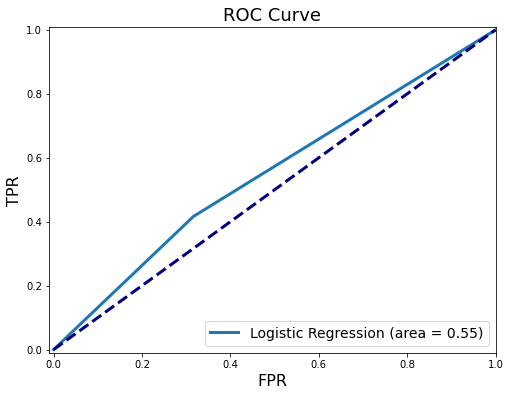

In [ ]:
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

### Optimized Gradient Boosting Clasifier: accuracy = 0.62, fpr=0.22, tpr =0.41, AUC = 0.59

In [ ]:
#Model 2: Gradient Boosted classifier with cross-validation 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import time 

# Gridsearch made on the maximum number of leaf per nodes and the number of estimator

grid_values = {'max_leaf_nodes': np.linspace(2, 10, 9, dtype='int32'),
               'min_samples_leaf': [10],
               'n_estimators': np.logspace(9, 13, num=8, base=2, dtype='int32'),
               'learning_rate': [0.01],
               'random_state': [88]}

tic = time.time()

gbc = GradientBoostingClassifier()
gbc_cv = GridSearchCV(gbc, param_grid=grid_values, scoring='accuracy', cv=5, verbose = 3)
gbc_cv.fit(xd, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

IndentationError: unexpected indent (<ipython-input-82-e45516098f97>, line 10)

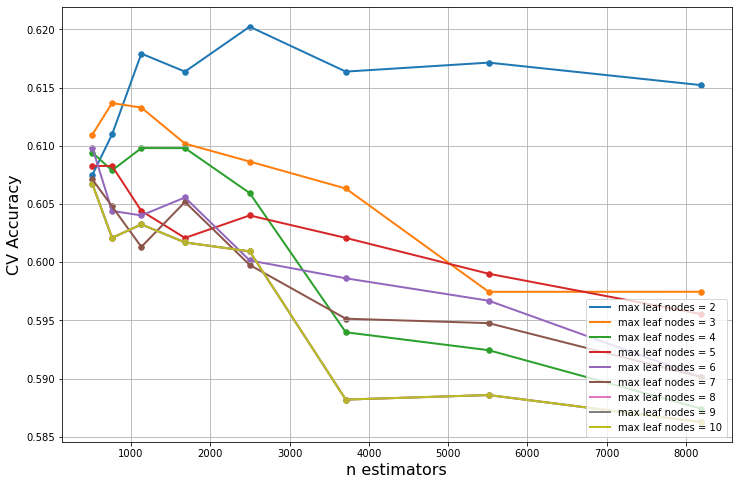

In [ ]:
#We plot different curve, one for each possible value of the maximum number of leaves per node, depending on the number of estimators
#For each pair maximum_leaves_nodes and n_estimators, we compute the accuracy and we choose the pair with the highest accuracy

n_estimators = gbc_cv.cv_results_['param_n_estimators'].data
accuracy_scores = gbc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.grid(True, which='both')

N = len(grid_values['max_leaf_nodes'])
M = len(grid_values['n_estimators'])
for i in range(N):
    plt.scatter(n_estimators[(M*i):(M*i)+M], accuracy_scores[(M*i):(M*i)+M], s=30)
    plt.plot(n_estimators[(M*i):(M*i)+M], accuracy_scores[(M*i):(M*i)+M], linewidth=2,
             label='max leaf nodes = '+str(grid_values['max_leaf_nodes'][i]))
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(gbc_cv.best_params_)

{'learning_rate': 0.01, 'max_leaf_nodes': 2, 'min_samples_leaf': 10, 'n_estimators': 2496, 'random_state': 88}


In [ ]:
gbc_opt = GradientBoostingClassifier(n_estimators=2496, verbose=3,min_samples_leaf = 10,
                                max_leaf_nodes=2,learning_rate = 0.01, random_state = 88)
gbc_opt.fit(xd,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3576            3.43m
         2           1.3569            2.56m
         3           1.3563            2.26m
         4           1.3556            2.02m
         5           1.3550            1.92m
         6           1.3544            1.93m
         7           1.3538            1.99m
         8           1.3532            2.17m
         9           1.3526            2.18m
        10           1.3521            2.19m
        11           1.3515            2.28m
        12           1.3510            2.43m
        13           1.3505            2.40m
        14           1.3499            2.32m
        15           1.3494            2.26m
        16           1.3489            2.20m
        17           1.3484            2.17m
        18           1.3479            2.26m
        19           1.3474            2.33m
        20           1.3469            2.31m
        21           1.3464            2.32m
        2

GradientBoostingClassifier(learning_rate=0.01, max_leaf_nodes=2,
                           min_samples_leaf=10, n_estimators=2496,
                           random_state=88, verbose=3)

In [ ]:
print('Accuracy:', round(accuracy_score(y_test, gbc_opt.predict(xd_test)), 5))

Accuracy: 0.62196


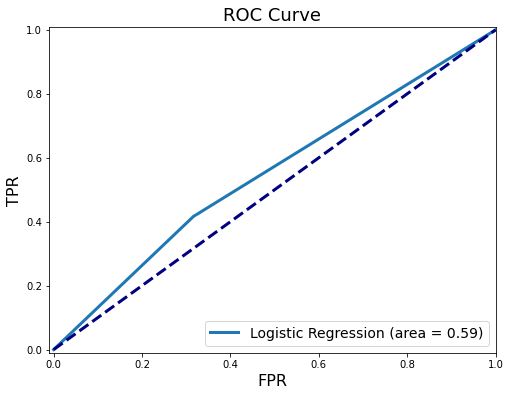

[0.         0.22170543 1.        ] [0.        0.4055794 1.       ]


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_opt, tpr_opt, _ = roc_curve(y_test, gbc_opt.predict(xd_test))

roc_auc = auc(fpr_opt, tpr_opt)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()
print(fpr_opt,tpr_opt)

### Final model with features selection: AUC = 0.63, TPR =0.42, FPR = 0.32, AUC = 0.60

<ipython-input-95-10412ee12b3e>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


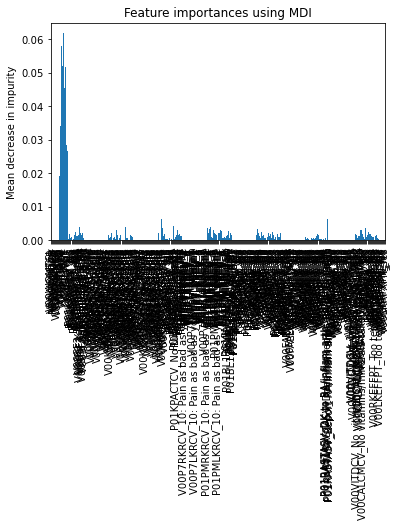

In [ ]:
#3rd model: we only select the 25 most important features and build a booster based on that
#We use the assessment of features importance thanks a model previously built
#The importance of each feature is assessed by looking at how important a feature have been to construct each tree of the global model

importances = gbc.feature_importances_

forest_importances = pd.Series(importances, index=xd.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
print(feat_importances.nlargest(5).index)

Index(['V00DTCHOL', 'V00DTVITD', 'V00DTCALC', 'V00PASE', 'P01BMI'], dtype='object')


In [ ]:
#Here, we only retain the 25 most important features
columns_red = feat_importances.nlargest(25).index
xd_red = pd.DataFrame()
for column in columns_red:
    xd_red[column] = xd[column]

In [ ]:
xd_red.head()

,V00DTCHOL,V00DTVITD,V00DTCALC,V00PASE,P01BMI,V00WOMTSR,V00WTMINKG,V00BPSYS,V00WTMAXKG,V00LLWGT,...,V00SF8_Not at all,V00HT25MM,P01ARTHOTH_Yes,V00COMORB,V00P7RKRCV_3,V00KOOSFX5_Mild,P01RASTASV_Does not report RA/inflam arth,P01KPACDCV,V00P7RKFR_Always,P02KPMED_No
1489,300.6,260.66,984.8,50.0,43.9,25.2,59.1,120.0,109.1,17.0,...,0,1600.2,0,1.0,0,0,1,16.0,0,0
364,157.5,164.02,904.2,199.0,27.8,0.0,67.7,138.0,81.8,20.0,...,1,1676.4,0,0.0,0,0,1,0.0,0,1
2939,134.6,151.06,1071.8,340.0,21.3,0.0,52.3,120.0,63.6,12.0,...,1,1651.0,0,0.0,0,0,1,0.0,0,1
1342,161.3,58.17,361.4,172.0,25.0,5.0,53.2,128.0,75.5,17.0,...,0,1651.0,0,0.0,1,1,1,3.0,0,1
1425,334.4,161.20,1046.9,237.0,27.5,4.0,53.6,126.0,75.0,16.0,...,0,1549.4,1,0.0,1,0,1,0.0,0,0


In [ ]:
gbc2 = GradientBoostingClassifier(n_estimators=2496, verbose=3,min_samples_leaf = 10,
                                max_leaf_nodes=2,learning_rate = 0.01, random_state = 88) 
gbc2.fit(xd_red, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3576           31.21s
         2           1.3569           31.66s
         3           1.3563           33.53s
         4           1.3556           38.04s
         5           1.3550           40.17s
         6           1.3544           41.87s
         7           1.3538           42.57s
         8           1.3532           45.16s
         9           1.3526           45.25s
        10           1.3521           44.63s
        11           1.3515           44.99s
        12           1.3510           44.60s
        13           1.3505           44.24s
        14           1.3499           44.94s
        15           1.3494           46.17s
        16           1.3489           45.15s
        17           1.3484           44.23s
        18           1.3479           43.30s
        19           1.3474           42.47s
        20           1.3469           41.71s
        21           1.3464           41.01s
        2

GradientBoostingClassifier(learning_rate=0.01, max_leaf_nodes=2,
                           min_samples_leaf=10, n_estimators=2496,
                           random_state=88, verbose=3)

In [ ]:
xd_red_test = pd.DataFrame()
for column in columns_red:
    xd_red_test[column] = xd_test[column]

In [ ]:
from sklearn.metrics import accuracy_score


print('Accuracy:', round(accuracy_score(y_test, gbc2.predict(xd_red_test)), 5))

Accuracy: 0.63366


[0.         0.31627907 1.        ] [0.         0.41630901 1.        ]


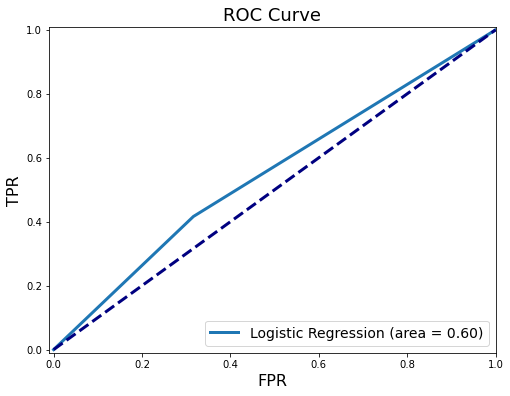

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr2, tpr2, _ = roc_curve(y_test, gbc2.predict(xd_red_test))

print (fpr,tpr)
roc_auc = auc(fpr2, tpr2)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

[0.         0.31627907 1.        ] [0.         0.41630901 1.        ]


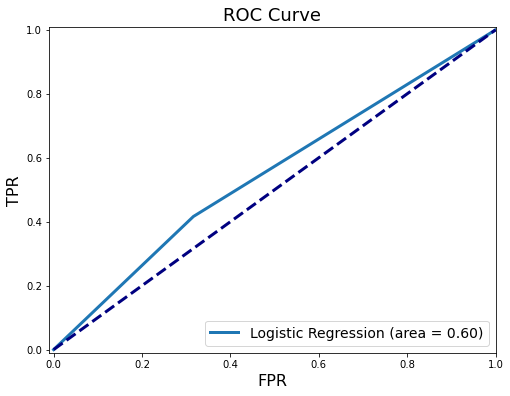

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr2, tpr2, _ = roc_curve(y_test, gbc2.predict(xd_red_test))

print (fpr,tpr)
roc_auc = auc(fpr2, tpr2)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()